# Question 1  

An article i nthe International Journal of Research in Marketing describes an experiment to test new ideas to increase credit card division of a financial servies compant. They want to improve the response rate to its credit card offers. They know from experience that the interest rates are an important factor in attracting potential customers, so they havedecided to focus on factors involving both interest rates and fees. They want to test changes in both introductory and long-term rates, as well as the effects of adding an account-opening fee and lower the annual fee. The factors tested in the experiment are as follows:

In [52]:
run <- 1:16
A <- factor(c(-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1))
B <- factor(c(-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1))
C <- factor(c(-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1))
D <- factor(c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1))
y <- c(2.45, 3.36, 2.16, 2.29, 2.49, 3.39, 2.32, 2.44, 1.84, 2.24, 1.69, 1.87, 2.29, 2.92, 2.04, 2.03)
label <- c("(1)", "a", "b", "ab", "c", "ac", "bc", "abc", "d", "ad", "bd", "abd", "cd", "acd", "bcd", "abcd")
data <- data.frame(run, A, B, C, D, y, label)

where, 

| Factor | (-1) Control | (+1) New Idea |
| --- | --- | --- |
| A: Annual Fee | Current | Lower |
| B: Account-opening fee | No | Yes |
|C: Initial interest rate | Current | Lower |
|D: Long-term interest rate | Low | High |

**a)** Analyze the data and determine which factor is not significant.


In [53]:
model <- lm(y ~ A+B+C+D, data = data)
model.aov <- aov(model)
summary(model.aov)


            Df Sum Sq Mean Sq F value  Pr(>F)   
A            1 0.6642  0.6642   11.04 0.00679 **
B            1 1.0712  1.0712   17.81 0.00144 **
C            1 0.2550  0.2550    4.24 0.06397 . 
D            1 0.9900  0.9900   16.46 0.00189 **
Residuals   11 0.6617  0.0602                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**b)** Project the $2^4$ design into two replicates of a $2^3$ on the significant factors. The new design table should include the runs, factors, responses, and labels.

In [54]:
projection <- subset(data, select = -C)
projection$label <- gsub("c", "", projection$label)
projection$label[5] <- "(1)"
projection

,run,A,B,D,y,label
,<int>,<fct>,<fct>,<fct>,<dbl>,<chr>
1,1,-1,-1,-1,2.45,(1)
2,2,1,-1,-1,3.36,a
3,3,-1,1,-1,2.16,b
4,4,1,1,-1,2.29,ab
5,5,-1,-1,-1,2.49,(1)
6,6,1,-1,-1,3.39,a
7,7,-1,1,-1,2.32,b
8,8,1,1,-1,2.44,ab
9,9,-1,-1,1,1.84,d


**c)** In the projected design, what is the estimated effect of the account-opening fee in the response rate? 

In [55]:
model2 <- lm(y ~ A*B*D, data = projection)
summary(model2)


Call:
lm(formula = y ~ A * B * D, data = projection)

Residuals:
   Min     1Q Median     3Q    Max 
 -0.34  -0.08   0.00   0.08   0.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4700     0.1643  15.035 3.78e-07 ***
A1            0.9050     0.2323   3.895  0.00457 ** 
B1           -0.2300     0.2323  -0.990  0.35117    
D1           -0.4050     0.2323  -1.743  0.11945    
A1:B1        -0.7800     0.3286  -2.374  0.04496 *  
A1:D1        -0.3900     0.3286  -1.187  0.26927    
B1:D1         0.0300     0.3286   0.091  0.92949    
A1:B1:D1      0.3500     0.4647   0.753  0.47288    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2323 on 8 degrees of freedom
Multiple R-squared:  0.8814,	Adjusted R-squared:  0.7777 
F-statistic: 8.497 on 7 and 8 DF,  p-value: 0.003616


The estimated effect from the account-opening fee on the response rate from the projected data is: $-0.23$.

**d)** Using the projected design, is the account-opening fee significant?

In [56]:
model2.aov <- aov(model2)
summary(model2.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
A            1 0.6642  0.6642  12.306 0.00798 **
B            1 1.0712  1.0712  19.847 0.00213 **
D            1 0.9900  0.9900  18.342 0.00268 **
A:B          1 0.3660  0.3660   6.781 0.03142 * 
A:D          1 0.0462  0.0462   0.856 0.38181   
B:D          1 0.0420  0.0420   0.779 0.40330   
A:B:D        1 0.0306  0.0306   0.567 0.47288   
Residuals    8 0.4318  0.0540                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The value $F = 19.847$ has a p-value of $0.00213 < 0.05$. Therefore we conclude there is strong evidence that the account-opening fee is significant.

**e)** Confound the projected design with blocks using the highest order interaction as a counfounding. Write down the runs for both blocks and estimate the block effect. What is the block effect really estimating in this Case?

In [57]:
Block=c(1,2,2,1,2,1,1,2,2,1,1,2,1,2,2,1)
model3.aov<-aov(y~A*B*D + Block ,data= projection)
summary(model3.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
A            1 0.6642  0.6642  11.050 0.01269 * 
B            1 1.0712  1.0712  17.821 0.00393 **
D            1 0.9900  0.9900  16.470 0.00482 **
Block        1 0.0110  0.0110   0.183 0.68133   
A:B          1 0.3660  0.3660   6.089 0.04298 * 
A:D          1 0.0462  0.0462   0.769 0.40961   
B:D          1 0.0420  0.0420   0.699 0.43069   
A:B:D        1 0.0306  0.0306   0.509 0.49847   
Residuals    7 0.4208  0.0601                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Other Stuff

In [43]:
rm(list = ls())
#install.packages("conf.design")
require("conf.design")
A=rep(c(-1,1),8)
B=rep(c(rep(-1,2),rep(1,2)),4)
C=rep(c(rep(-1,4),rep(1,4)),2)
D=c(rep(-1,8),rep(1,8))
X=matrix(c(rep(1,16),A,B,C,D),nrow=16,ncol=5)
#Beta_hat1=solve(t(X)%*%X)%*%t(X)%*%FiltrationRate
FiltrationRate=c(45,71,48,65,68,60,80,65,43,100,45,104,75,86,70,96)
FiltrationRate_Data <- data.frame(FiltrationRate, A,B,C,D)



In [48]:
FiltrationRate_Data

FiltrationRate,A,B,C,D
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,-1,-1,-1,-1
71,1,-1,-1,-1
48,-1,1,-1,-1
65,1,1,-1,-1
68,-1,-1,1,-1
60,1,-1,1,-1
80,-1,1,1,-1
65,1,1,1,-1
43,-1,-1,-1,1


In [44]:
factor(A)
res.lm<-lm(FiltrationRate~A+B, data=FiltrationRate_Data)
res.lm<-lm(FiltrationRate~A*B*C*D, data=FiltrationRate_Data)
summary(res.lm)


[1] -1 1  -1 1  -1 1  -1 1  -1 1  -1 1  -1 1  -1 1 
Levels: -1 1


Call:
lm(formula = FiltrationRate ~ A * B * C * D, data = FiltrationRate_Data)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  70.0625        NaN     NaN      NaN
A            10.8125        NaN     NaN      NaN
B             1.5625        NaN     NaN      NaN
C             4.9375        NaN     NaN      NaN
D             7.3125        NaN     NaN      NaN
A:B           0.0625        NaN     NaN      NaN
A:C          -9.0625        NaN     NaN      NaN
B:C           1.1875        NaN     NaN      NaN
A:D           8.3125        NaN     NaN      NaN
B:D          -0.1875        NaN     NaN      NaN
C:D          -0.5625        NaN     NaN      NaN
A:B:C         0.9375        NaN     NaN      NaN
A:B:D         2.0625        NaN     NaN      NaN
A:C:D        -0.8125        NaN     NaN      NaN
B:C:D        -1.3125        NaN     NaN      NaN
A:B:C:D       0.6875        NaN     NaN      NaN

Res

In [49]:
X

1,0,0
1,1,0
1,0,1
1,1,1
1,0,0
1,1,0
1,0,1
1,1,1
1,0,0
1,1,0
1,0,1


In [45]:
A1=rep(c(0,1),8)
B1=rep(c(rep(0,2),rep(1,2)),4)
X=matrix(c(rep(1,16),A1,B1),nrow=16,ncol=3)
Beta_hat2=solve(t(X)%*%X)%*%t(X)%*%FiltrationRate

res.aov<-aov(FiltrationRate~A*B*C*D,data=FiltrationRate_Data)
summary(res.aov)
summary(res.lm)



            Df Sum Sq Mean Sq
A            1 1870.6  1870.6
B            1   39.1    39.1
C            1  390.1   390.1
D            1  855.6   855.6
A:B          1    0.1     0.1
A:C          1 1314.1  1314.1
B:C          1   22.6    22.6
A:D          1 1105.6  1105.6
B:D          1    0.6     0.6
C:D          1    5.1     5.1
A:B:C        1   14.1    14.1
A:B:D        1   68.1    68.1
A:C:D        1   10.6    10.6
B:C:D        1   27.6    27.6
A:B:C:D      1    7.6     7.6


Call:
lm(formula = FiltrationRate ~ A * B * C * D, data = FiltrationRate_Data)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  70.0625        NaN     NaN      NaN
A            10.8125        NaN     NaN      NaN
B             1.5625        NaN     NaN      NaN
C             4.9375        NaN     NaN      NaN
D             7.3125        NaN     NaN      NaN
A:B           0.0625        NaN     NaN      NaN
A:C          -9.0625        NaN     NaN      NaN
B:C           1.1875        NaN     NaN      NaN
A:D           8.3125        NaN     NaN      NaN
B:D          -0.1875        NaN     NaN      NaN
C:D          -0.5625        NaN     NaN      NaN
A:B:C         0.9375        NaN     NaN      NaN
A:B:D         2.0625        NaN     NaN      NaN
A:C:D        -0.8125        NaN     NaN      NaN
B:C:D        -1.3125        NaN     NaN      NaN
A:B:C:D       0.6875        NaN     NaN      NaN

Res

In [46]:
res.aov3<-aov(FiltrationRate~factor(A)*factor(B)*factor(C)*factor(D),data=FiltrationRate_Data)
summary(res.aov3)
#Which factors are important? 
#We only have one obs so we need the normal prob. plot



                                        Df Sum Sq Mean Sq
factor(A)                                1 1870.6  1870.6
factor(B)                                1   39.1    39.1
factor(C)                                1  390.1   390.1
factor(D)                                1  855.6   855.6
factor(A):factor(B)                      1    0.1     0.1
factor(A):factor(C)                      1 1314.1  1314.1
factor(B):factor(C)                      1   22.6    22.6
factor(A):factor(D)                      1 1105.6  1105.6
factor(B):factor(D)                      1    0.6     0.6
factor(C):factor(D)                      1    5.1     5.1
factor(A):factor(B):factor(C)            1   14.1    14.1
factor(A):factor(B):factor(D)            1   68.1    68.1
factor(A):factor(C):factor(D)            1   10.6    10.6
factor(B):factor(C):factor(D)            1   27.6    27.6
factor(A):factor(B):factor(C):factor(D)  1    7.6     7.6

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 1870.6  1870.6  83.368 1.67e-05 ***
C            1  390.1   390.1  17.384 0.003124 ** 
D            1  855.6   855.6  38.131 0.000267 ***
A:C          1 1314.1  1314.1  58.565 6.00e-05 ***
A:D          1 1105.6  1105.6  49.273 0.000110 ***
C:D          1    5.1     5.1   0.226 0.647483    
A:C:D        1   10.6    10.6   0.471 0.512032    
Residuals    8  179.5    22.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
lm(formula = FiltrationRate ~ A * C * D, data = FiltrationRate_Data)

Residuals:
   Min     1Q Median     3Q    Max 
  -6.0   -2.5    0.0    2.5    6.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  70.0625     1.1842  59.164 7.40e-12 ***
A            10.8125     1.1842   9.131 1.67e-05 ***
C             4.9375     1.1842   4.169 0.003124 ** 
D             7.3125     1.1842   6.175 0.000267 ***
A:C          -9.0625     1.1842  -7.653 6.00e-05 ***
A:D           8.3125     1.1842   7.019 0.000110 ***
C:D          -0.5625     1.1842  -0.475 0.647483    
A:C:D        -0.8125     1.1842  -0.686 0.512032    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.737 on 8 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  0.9413 
F-statistic: 35.35 on 7 and 8 DF,  p-value: 2.119e-05


            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 1870.6  1870.6   95.86 1.93e-06 ***
C            1  390.1   390.1   19.99   0.0012 ** 
D            1  855.6   855.6   43.85 5.92e-05 ***
A:C          1 1314.1  1314.1   67.34 9.41e-06 ***
A:D          1 1105.6  1105.6   56.66 2.00e-05 ***
Residuals   10  195.1    19.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

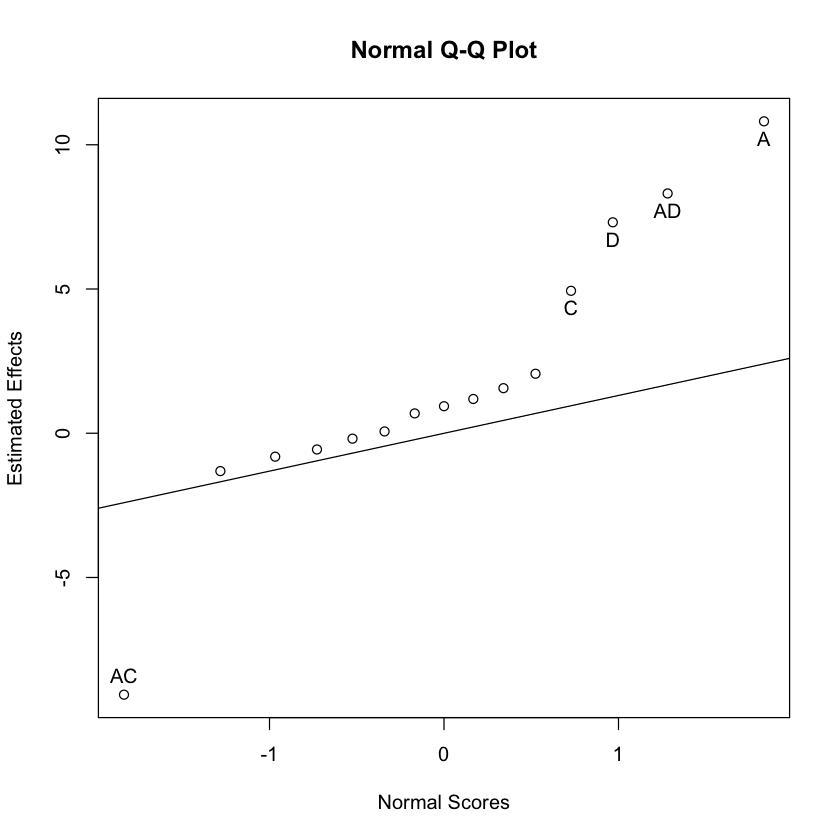

In [47]:
#install.packages("daewr")
library(daewr)
fullnormal(coef(res.lm)[-1],alpha=.025)

#Projected model
res.aov<-aov(FiltrationRate~A*C*D,data=FiltrationRate_Data)
summary(res.aov)
res.lm<-lm(FiltrationRate~A*C*D, data=FiltrationRate_Data)
summary(res.lm)

#Final model - remove non-significant terms
res.aov<-aov(FiltrationRate~A*C*D-A:C:D-C:D,data=FiltrationRate_Data)
summary(res.aov)